# Introducció a la pràctica 2

## Objectius

Els objectius d'aquesta pràctica són:
  
* Aplicar models de classificació, ficant l'èmfasi en:
    1. Aplicar diferents classificadors (regressor logístic i svm) i entendre les millores d'aplicar kernels.
    2. Avaluar correctament l'error del model 
    3. Visualitzar les dades i el model resultant


* Ésser capaç d'aplicar tècniques de classificació en casos reals

* Validar els resultats en dades reals

* Fomentar la capacitat per presentar resultats tècnics d'aprenentatge computacional de forma adequada davant altres persones


## Bases de dades

Cada grup utilitzarà les bases de dades que se li hagin assignat depenent del grup on s'ha apuntat al caronte. 


| # | GRUP | BASE DE DADES ASSIGNADA|
|:-:|:-:|:--|
|	1	|	GA\*01-0000	| https://www.kaggle.com/rounakbanik/pokemon	|
|	2	|	GA\*02-0000	| https://www.kaggle.com/c/titanic/data	|
|	3	|	GA\*03-0000	| https://www.kaggle.com/jsphyg/weather-dataset-rattle-package	|
|	4	|	GA\*04-0000	|https://www.kaggle.com/iabhishekofficial/mobile-price-classification	|





## Avaluació i entregues de la pràctica 2

En la pràctica 2, es presenten diversos problemes per comprendre els mètodes de classificació numèrica.

Les entregues s'organitzen en dos nivells d'assoliment dels objectius, incrementals: apartat **B, (sobre 6 punts)**, assoliment baix; apartat **A, (sobre 4 punts)**, assoliment alt. La suma dels 2 apartats serà la nota final de la pràctica 2. Per a realitzar el apartat A, prèviament s'ha d'haver resolt l'apartat B.

Per cada apartat s'utilitzarà una base de dades diferent. A l'apartat B, treballarem majoritariament amb dades numèriques i es farà servir per establir les bases i l'esquelet per l'apartat A, on hi trobarem unes dades molt més riques i complexes.

Similarment a la sessió de de treball de la pràctica 1, a la sessió de treball es molt recomanat que pregunteu sobre les bases de dades assignades, els problemes que heu de resoldre, per si hi haguéssin errors amb les llibreries o les seves funcions, aclaracions sobre les preguntes a contestar i els metodes a aplicar...

Així, aquesta sessió de treball està orientada a que, els alumnes que vingueu pugueu preguntar i resoldre dubtes sobre les bases de dades que us han estat assignades, preguntar sobre l'objectiu de cada apartat dels enunciats que no us hagi quedat clar, i preguntar sobre els resultats que esteu obtenint a l'hora d'analitzar les dades. A més, podreu veure com els vostres companys estan resolent altres bases de dades, per agafar idees i veure com altres problemes es poden solucionar amb els mètodes que heu vist a classe de teoria.

I en la següent sessió del 25 de novembre s'evaluarà la **pràctica sencera amb els dos apartats**. Caldrà pujar al Caronte abans de les 00:59 del dimecres 24 de novembre un ZIP amb el codi, la documentació i el ppt (10 minuts).

   * Entrega (Apartat B 6pts + Apartat A 4pts)
     1. Memòria en format article explicant els resultats trobats sobre la bases de dades de l'apartat B i els experiments realitzats sobre la base de dades A (10-50 pàgs). (4pts + 2.5pts)
     2. Codi python desenvolupat. (1.5pts + 1pts)
     3. Presentació amb els resultats 4 min màxim. (0.5pts + 0.5pts)


# Apartat (B): Comparativa de models (4pts)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# import some data to play with
iris = datasets.load_iris()

# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

n_classes = 3
    
fig, sub = plt.subplots(1, 2, figsize=(16,6))
sub[0].scatter(X[:,0], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
sub[1].scatter(X[:,1], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')


particions = [0.5, 0.7, 0.8]

for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)

    # l'entrenem
    logireg.fit(x_t, y_t)

    print ("Percentage of correct classification of  Logistic model,  training with ", part, "% of the data: ", logireg.score(x_v, y_v),"%")
    
    #Creem el regresor logístic
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)

    # l'entrenem 
    svc.fit(x_t, y_t)
    probs = svc.predict_proba(x_v)
    print ("Percentage of correct classification of  SVM model,       training with ", part, "% of the data: ", svc.score(x_v, y_v),"%")


Tal com podeu llegir a [l'API de sklearn](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html), en comptes de fer una corba per cada classe, podem considerar totes les classes en conjunt en una sola corba (1 si hem predit la classe correcta, 0 si no). Això es coneix com a `micro-averaging`. 

Així, veureu que la funció `f1_score` utilitza el paràmetre `macro` per calcular la precision-recall-f1 per clase, i després fer la mitja pr a totes les classes; i `micro` per utilitzar totes les prediccions (i errors de FN, FP) per a calcular una única precision-recall-f1 per a totes les classes juntes.

Si voleu calcular la corba Precision-Recall quan utilitzeu el K-fold, cal calcular les corbes per a cada fold i després [fer la mitja de tots els folds per obtenir la corba final](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py). En el cas del LOOCV no té sentit fer la mitja la corba PR perquè hauriem de fer servir totes les mostres com a $y$.


In [ ]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure(figsize=(15,10))

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
    average_precision[i] = average_precision_score(y_v == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="lower left")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure(figsize=(15,10))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def show_C_effect(C=1.0, gamma=0.7, degree=3):

    # import some data to play with
    iris = datasets.load_iris()
    # Take the first two features. We could avoid this by using a two-dim dataset
    X = iris.data[:, :2]
    y = iris.target

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

    #C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C, max_iter=1000000),
              svm.SVC(kernel='rbf', gamma=gamma, C=C),
              svm.SVC(kernel='poly', degree=degree, gamma='auto', C=C))
    models = (clf.fit(X, y) for clf in models)

    plt.close('all')
    fig, sub = plt.subplots(2, 2, figsize=(14,9))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Sepal length')
        ax.set_ylabel('Sepal width')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()


Podeu provar quin efecte té diferents valors de regularització per aquest petit exemple ( C=0.0001 to 1000..). També podeu veure com afecta els valors de degree i gamma. 

In [ ]:
C_values=[0.0001,0.001,0.01,0.1,1,10,100,1000]
i=0
show_C_effect(C=C_values[i])
i+=1

In [ ]:
show_C_effect(C=C_values[i])
i+=1

In [ ]:
show_C_effect(C=C_values[i])
i+=1

In [ ]:
show_C_effect(C=C_values[i])
i+=1

In [ ]:
show_C_effect(C=C_values[i])
i+=1

In [ ]:
show_C_effect(C=C_values[i])
i+=1

In [ ]:
show_C_effect(C=C_values[i])
i+=1

In [ ]:
show_C_effect(C=C_values[i])
i+=1

# Apartat (A): Classificació Numèrica (6pts)

Per a aquest primer apartat, s'analitzarà els tipus d'atributs que es tenen i, si no està estipulat, **caldrà fixar quin és l'atribut objectiu a classificar de tots els que hi ha a la base de dades**.
Expliqueu a la memòria quin atribut heu fet servir, no hi ha una decisió única correcta, cal que doneu raons de per què heu triat l'atribut que hàgiu triat.

Treballarem varis aspectes de la classificació:

1. EDA (exploratory data analysis)
2. Preprocessing (normalitzation, outlier removal, feature selection..)
3. Model Selection
4. Crossvalidation
5. Metric Analysis
6. Hyperparameter Search


Durant els següents apartats, es recomana anar fent una taula amb el mètode, paràmetres i precisió obtinguda. D'aquesta manera serà més fàcil entendre i valorar què s'aconsegueix en cada metode. Exemple:

<img src="images/table_1.png" width="80%">

Les preguntes de cada apartat són orientatives. **NO** cal contestar-les totes, ni totes tindrán sentit per tots els datasets. Són una guia per a que reflexioneu i aprengueu detalls de cada apartat. Tot i no ser obligatories, si que són molt recomenades d'intentar respondre.

In [ ]:
# Funcio per a llegir dades en format csv
import pandas as pd
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
df = load_dataset('pokemon.csv')

# Fem una correció al dataset
df.at[773, 'capture_rate'] = '30'
df.at[773, 'attack'] = np.int64(60)
df.at[773, 'defense'] = np.int64(100)
df.at[773, 'sp_attack'] = np.int64(60)
df.at[773, 'sp_defense'] = np.int64(100)
df.at[773, 'speed'] = np.int64(60)
df.at[773, 'base_total'] = np.int64(440)

df.at[719, 'classfication'] = 'Mischief Pokémon'
df.at[719, 'attack'] = np.int64(110)
df.at[719, 'defense'] = np.int64(60)
df.at[719, 'sp_attack'] = np.int64(150)
df.at[719, 'sp_defense'] = np.int64(130)
df.at[719, 'speed'] = np.int64(70)
df.at[719, 'base_total'] = np.int64(600)
df.at[719, 'height_m'] = np.int64(0.5)
df.at[719, 'weight_kg'] = np.int64(9)


df['capture_rate'] = df['capture_rate'].astype(np.int64)
df['abilities'] = df['abilities'].apply(lambda x: eval(x))

data = df.values
labels = df.columns.values

### 1. EDA (exploratory data analysis)

Igual com a la pràctica anterior, exploreu i visualitzeu com és la base de dades que teniu assignada.

**Preguntes:**
* Quants atributs té la vostra base de dades?
    * _**Resposta:** La nostra base de dades té 41 atributs._
* Quin tipus d'atributs tens? (Númerics, temporals, categorics, binaris...)
    * _**Resposta:** Els tipus d'atributs que tenim són els següents:_
    | Atribut | Tipus | Descripció |
    | :-- | :-: | :-- |
    |name| String |The English name of the Pokemon|
    |japanese_name| String |The Original Japanese name of the Pokemon|
    |pokedex_number| Numeric |The entry number of the Pokemon in the National Pokedex|
    |percentage_male| Numeric. |The percentage of the species that are male. Blank if the Pokemon is genderless.|
    |type1| String, categoric |The Primary Type of the Pokemon|
    |type2| String, categoric |The Secondary Type of the Pokemon|
    |classification| String, categoric |The Classification of the Pokemon as described by the Sun and Moon Pokedex|
    |height_m| Numeric |Height of the Pokemon in metres|
    |weight_kg| Numeric |The Weight of the Pokemon in kilograms|
    |capture_rate| Numeric |Capture Rate of the Pokemon|
    |baseeggsteps| Numeric |The number of steps required to hatch an egg of the Pokemon|
    |abilities| String, categoric |A stringified list of abilities that the Pokemon is capable of having|
    |experience_growth| Numeric |The Experience Growth of the Pokemon|
    |base_happiness| Numeric |Base Happiness of the Pokemon|
    |against_?| Numeric |Eighteen features that denote the amount of damage taken against an attack of a particular type|
    |hp| Numeric |The Base HP of the Pokemon|
    |attack| Numeric |The Base Attack of the Pokemon|
    |defense| Numeric |The Base Defense of the Pokemon|
    |sp_attack| Numeric |The Base Special Attack of the Pokemon|
    |sp_defense| Numeric |The Base Special Defense of the Pokemon|
    |speed| Numeric |The Base Speed of the Pokemon|
    |generation| Numeric |The numbered generation which the Pokemon was first introduced|
    |is_legendary| Binary |Denotes if the Pokemon is legendary|
  
* Com es el target, quantes categories diferents existeixen?
    * _**Resposta:** El nostre target és 'is_legendary', i, com que és una dada binària, té dues categories (una per a Pokemon legendaris, l'altra per a no legendaris)._

* Podeu veure alguna correlació entre X i y?
    * _**Resposta:** Sí._

In [ ]:
import seaborn as sns

# Treiem els atributs de against_? i els dels noms
dropped = list(labels[1:19]) + list(labels[29:31])
df_mod = df.drop(columns=[l for l in dropped])
correlacio = df_mod.corr()

plt.figure(figsize=(15, 15))

# Mirem la correlació entre els atributs per entendre millor les dades
ax = sns.heatmap(correlacio, annot=True, linewidths=.5, center=0)

In [ ]:
labels = df_mod.columns.values

for i in [5, 4, 10, 1, 7, 13, 14, 15, 9, 18]:
    plt.subplots(figsize=(10, 10))
    sns.histplot(df_mod, x=labels[i], hue=labels[20], multiple="layer", element="poly")
    plt.show()

for i in [2, 3, 8, 12, 19]:
    plt.subplots(figsize=(10, 10))
    sns.histplot(df_mod, x=labels[i], hue=labels[20], multiple="stack")
    plt.show()
    

* Estan balancejades les etiquetes (distribució similar entre categories)? Creus que pot afectar a la classificació la seva distribució?
    * _**Resposta:** No, no estan gens balancejades. Hi ha molt pocs legendaris, i això pot esbiaixar la classificació (un classificador que digui "no legendari" per a qualsevol pokemon tindrà una bona accuracy, i això és inadmissible)._

### 2. Preprocessing (normalitzation, outlier removal, feature selection..)
Un cop vistes les dades de les que es disposa, per tal de tenir un aprenentatge més eficient, es recomana normalitzar les dades i treure outliers. Segons la tipologia de dades, es poden filtrar atributs, aplicar-hi reductors de dimensionalitat, codificar categories textuals en valors numèrics..

Navegueu per la [documentació de sklearn sobre preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) per tal de trobar les diferents opcions que proporciona sklearn.

**Preguntes:**
* Estàn les dades normalitzades? Caldria fer-ho?
    * _**Resposta:** No, les dades no estan normalitzades: l'escala amb que es mesuren els atributs no és la mateixa per a tots. Pensem que serà convenient normalitzar les dades._
* En cas que les normalitzeu, quin tipus de normalització será més adient per les vostres dades?
    * _**Resposta:** Depenent de la distribució de les dades en cada atribut, farem ús d'un tipus de normalització, o un d'altre (e.g.: TODO)._

In [ ]:
df_norm = df_mod

* Teniu gaires dades sense informació? Els NaNs a pandas? Tingueu en compte que hi ha metodes que no els toleren durant el aprenentatge. Com afecta a la classificació si les filtrem? I si les reompliu? Com ho farieu? [Pista](https://scikit-learn.org/stable/modules/impute.html)
    * _**Resposta:** Sí, tenim un atribut on és molt freqüent trobar NaNs: "percentage_male". Aquests NaN tenen una explicació lògica: hi ha tot un conjunt de Pokémon que no tenen gènere (anomenats "genderless"). Hem aprofitat la presència d'aquests NaN per a crear un atribut "genderless", que val 1 per als casos on "percentage_male" és "NaN", i zero altrament. Aquesta variable sembla tenir força correlació amb el comportament de la variable objectiu "is_legendary". Un altre atribut que té "NaN" és `type_2`, ja que hi ha força pokemon que són d'un sol tipus. Hem provat a crear un atribut per a els Pokemon d'un sol tipus, però no té gaire correlació amb la variable objectiu. Els últims atributs amb "Nan" són `height_m` i `weight_kg` on apareixen els pokemons que tenen una forma alola alternativa. Aquest atribut té el valor "Nan" en aquests casos inclus quan les dades de les formes coincideixen._

In [ ]:
df_extra = pd.DataFrame()
df_extra['genderless'] = df['percentage_male'].isnull() + 0
df_extra['percentage_male'] = df['percentage_male']
df_extra.at[df_extra['percentage_male'].isnull(), 'percentage_male'] = 0
df_extra['percentage_female'] = 1 - df['percentage_male']
df_extra.at[df_extra['percentage_female'].isnull(), 'percentage_female'] = 0
df_extra['monotype'] = df['type2'].isnull() + 0
df_extra['is_legendary'] = df['is_legendary']

In [ ]:
correlacio = df_extra.corr()

plt.figure(figsize=(15, 15))

# Mirem la correlació entre els atributs per entendre millor les dades
ax = sns.heatmap(correlacio, annot=True, linewidths=.5, center=0)

* Teniu dades categoriques? Quina seria la codificació amb més sentit? (`OrdinalEncoder`, `OneHotEncoder`, d'altres?)
    * _**Resposta:** Sí, tenim dades categòriques als atributs `type1`, `type2`, `classification` i `abilities`. Les variable `classification` i `abilities` no les farem servir ja que hi ha una quantita excesiva (per diverses mostres la seva categoria és única, per tant, el regressor ignoraria aquestes variables al training igualment) i no sembla aportar-nos gaire informació, i com que `type2` té força nulls (que indican que no té un segon tipus) i representa el mateix que `type1` l'ajuntarem amb aquesta per fer la codificació. Per tant, per a aquesta combinació, provarem a fer ús d'una codificació mitjant `OneHotEncoder`, ja que `OrdinalEncoder` pot donar problemes (trobar relacions espúries entre l'ordinal que representa cada categoria amb el comportament de la variable objectiu)._

In [ ]:
types = np.unique(df['type1'])
dt = pd.DataFrame(list(df.apply(lambda x: [(x.at['type1'] == t) * (x.at['type1'] == t)for t in types], axis=1)), columns=types)
dt['is_legendary'] = df['is_legendary']
    
abilities = []
for ability in df['abilities']:
    abilities += ability
abilities = np.unique(abilities)
da = pd.DataFrame(list(df['abilities'].apply(lambda x: [(ability in x) + 0 for ability in abilities])), columns=abilities)
da['is_legendary'] = df['is_legendary']

classfication = np.unique(df['classfication'])
dc = pd.DataFrame(list(df['classfication'].apply(lambda x: [(x == c) + 0 for c in classfication])), columns=classfication)
dc['is_legendary'] = df['is_legendary']

In [ ]:
import seaborn as sns

correlacio = dt.corr()

plt.figure(figsize=(15, 15))

# Mirem la correlació entre els atributs per entendre millor les dades
ax = sns.heatmap(correlacio, annot=True, linewidth=.5, center=0)
plt.show()

In [ ]:
plt.subplots(figsize=(60, 18))
plt.xticks(rotation=90)

ab = []
il = []
for ability, legendary in zip(df['abilities'], df['is_legendary']):
    ab += ability
    il += [legendary for _ in range(len(ability))]
    
sns.histplot(x=ab, hue=il, multiple="stack")
plt.show()
print(f"Numero d'abilitats diferents: {len(abilities)}")

In [ ]:
plt.subplots(figsize=(120, 18))
plt.xticks(rotation=90)

sns.histplot(x=df['classfication'], hue=df['is_legendary'], multiple="stack")
plt.show()
print(f"Numero de classificacions diferents: {len(classfication)}")

* Caldria aplicar `sklearn.decomposition.PCA`? Quins beneficis o inconvenients trobarieu?
    * _**Resposta:** Creiem que serà útil fer ús de `sklearn.decomposition.PCA`, per a veure d'una manera diferent quines variables expliquen en major mesura el comportament de la variable objectiu (i corroborar les observacions anteriors)._
* Es poden aplicar `PolynomialFeatures` per millorar la classificació? En quins casos té sentit fer-ho?

### 3. Model Selection
La tasca d'aquesta pràctica s'enmarca dins l'aprenentatge computacional **supervisat**. A sklearn, disposem de varies tècniques [(veure documentació)](https://scikit-learn.org/stable/supervised_learning.html). A les classes de teoria, hem vist varies tècniques, com ara logistic regression, SVM amb diferents kernels, Nearest Neighbour, i el perceptró...
En aquesta secció heu de valorar quina o quines tècniques voleu fer servir, aixi com també explicar el per què les heu seleccionat. Recomanem, que per entendre millor la teoria, s'ha de provar com a mínim un model de SVM.

**Preguntes:**
* Quins models heu considerat?
* Considereu les SVM amb els diferents kernels implementats.
* Quin creieu que serà el més precís?
* Quin serà el més ràpid?
* Seria una bona idea fer un `ensemble`? Quins inconvenients creieu que pot haver-hi? [Documentació](https://scikit-learn.org/stable/modules/ensemble.html)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

In [ ]:
df_full = pd.DataFrame()
attrib_mod = ['base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', \
             'experience_growth']
df_full[attrib_mod] = df_mod[attrib_mod]
attrib_extra = ['genderless', 'percentage_male']
df_full[attrib_extra] = df_extra[attrib_extra]
attrib_legendary = 'is_legendary'
df_full[attrib_legendary] = df[attrib_legendary]

probem amb els atributs:
base_egg_steps, base_total,genderless

In [ ]:
print(df_full.columns.values)
X = df_full.values[:, [0, 2, 5]]

y = df_full.values[:, 7]


particions = [0.5, 0.7, 0.8]


scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)



C_Log_Reg = 2.
C_SVM_rbf = 1. 
C_SVM_Lin = 100.

In [ ]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X_scaled, y, train_size=part, stratify=y)
    
    #Creem el regresor logístic
    logireg = LogisticRegression(C=C_Log_Reg, fit_intercept=True, penalty='l2', tol=0.001)

    # l'entrenem
    logireg.fit(x_t, y_t)

    print ("Correct classification Logistic ", part*100, "% of the data: ", logireg.score(x_v, y_v))
    print(metrics.classification_report(y_v, logireg.predict(x_v)))
    print(np.unique(logireg.predict(x_v)))

In [ ]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X_scaled, y, train_size=part, stratify=y)
    #SVC rbf
    svc = svm.SVC(C=C_SVM_rbf, kernel='rbf', gamma=0.9, probability=True)
    
    # l'entrenem 
    svc.fit(x_t, y_t)
    probs = svc.predict(x_v)
    print ("\n\nCorrect classification SVM rbf     ", part*100, "% of the data: ", svc.score(x_v, y_v))
    print(metrics.classification_report(y_v, svc.predict(x_v)))
    

In [ ]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X_scaled, y, train_size=part, stratify=y)
    #SVC Lineal
    svcLin = svm.LinearSVC(C=C_SVM_Lin, max_iter=1000000)
    svcLin.fit(x_t,y_t)
    probs = svcLin.predict(x_v)
    print ("\n\nCorrect classification SVM Linear ", part*100, "% of the data: ", svcLin.score(x_v, y_v))
    print(metrics.classification_report(y_v, probs))
    

Probem amb altres atributs:
base_happines, experience_growth, capture_rate

In [ ]:
print(df_full.columns.values)
X = df_full.values[:, [1,3,4]]

y = df_full.values[:, 7]

In [ ]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X_scaled, y, train_size=part, stratify=y)
    
    #Creem el regresor logístic
    logireg = LogisticRegression(C=C_Log_Reg, fit_intercept=True, penalty='l2', tol=0.001)

    # l'entrenem
    logireg.fit(x_t, y_t)

    print ("Correct classification Logistic ", part*100, "% of the data: ", logireg.score(x_v, y_v))
    print(metrics.classification_report(y_v, logireg.predict(x_v)))
    print(np.unique(logireg.predict(x_v)))

In [ ]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X_scaled, y, train_size=part, stratify=y)
    #SVC rbf
    svc = svm.SVC(C=C_SVM_rbf, kernel='rbf', gamma=0.9, probability=True)
    
    # l'entrenem 
    svc.fit(x_t, y_t)
    probs = svc.predict(x_v)
    print ("\n\nCorrect classification SVM rbf     ", part*100, "% of the data: ", svc.score(x_v, y_v))
    print(metrics.classification_report(y_v, svc.predict(x_v)))
    

In [ ]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X_scaled, y, train_size=part, stratify=y)
    #SVC Lineal
    svcLin = svm.LinearSVC(C=C_SVM_Lin, max_iter=1000000)
    svcLin.fit(x_t,y_t)
    probs = svcLin.predict(x_v)
    print ("\n\nCorrect classification SVM Linear ", part*100, "% of the data: ", svcLin.score(x_v, y_v))
    print(metrics.classification_report(y_v, probs))
    

### 4. Crossvalidation
Un cop seleccionats quins models es volen testejar sobre les dades, s'han de poder evaluar correctament. Per aquests motius, haurem d'aprendre a cros-validar els resultats.
Reviseu la [documentació](https://scikit-learn.org/stable/modules/cross_validation.html) i escolliu quin tipus de crossvalidació pot ser l'adecuada pel vostre problema.

**Preguntes:**
* Per què és important cross-validar els resultats?
* Separa la base de dades en el conjunt de train-test. Com de fiables serán els resultats obtinguts? En quins casos serà més fiable, si tenim moltes dades d'entrenament o poques?
* Quin tipus de K-fold heu escollit? Quants conjunts heu seleccionat (quina k)? Com afecta els diferents valors de k?
* Es viable o convenient aplicar `LeaveOneOut`?


In [ ]:
X = df_full.values[:, [0, 2, 5]]

y = df_full.values[:, 7]

In [ ]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X_scaled, y, train_size=part, stratify=y)
    
    #Creem el regresor logístic
    logireg = LogisticRegression(C=C_Log_Reg, fit_intercept=True, penalty='l2', tol=0.001)

    # l'entrenem
    logireg.fit(x_t, y_t)
    
    cvs = cross_val_score(logireg, x_v, y_v)
    print("Cross validation de partició " + str(part*100) + "%:")
    print(cvs)
    print("\n")

In [ ]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X_scaled, y, train_size=part, stratify=y)
    #SVC rbf
    svc = svm.SVC(C=C_SVM_rbf, kernel='rbf', gamma=0.9, probability=True)

    svc.fit(x_t, y_t)
    cvs = cross_val_score(svc, x_v, y_v)
    print("Cross validation de partició " + str(part*100) + "%:")
    print(cvs)
    print("\n")

In [ ]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X_scaled, y, train_size=part, stratify=y)
    #SVC Lineal
    svcLin = svm.LinearSVC(C=C_SVM_Lin, max_iter=1000000)
    svcLin.fit(x_t,y_t)
    cvs = cross_val_score(svc, x_v, y_v)
    print("Cross validation de partició " + str(part*100) + "%:")
    print(cvs)
    print("\n")

KFOLD TIME

Diferent Kfolds for Reg Log

In [ ]:
kf = KFold(n_splits=5)
count=0
for train_index, test_index in kf.split(X_scaled):
    x_t, x_v = X[train_index], X[test_index]
    y_t, y_v = y[train_index], y[test_index]
    logireg = LogisticRegression(C=C_Log_Reg, fit_intercept=True, penalty='l2', tol=0.001, max_iter=1000)

    logireg.fit(x_t, y_t)

    cvs = cross_val_score(logireg, x_v, y_v)
    count+=1
    print("Cross Validation del KFold: " + str(count))
    print(cvs)
    print("\n")

In [ ]:
kf = KFold(n_splits=4)
count=0
for train_index, test_index in kf.split(X_scaled):
    x_t, x_v = X[train_index], X[test_index]
    y_t, y_v = y[train_index], y[test_index]
    logireg = LogisticRegression(C=C_Log_Reg, fit_intercept=True, penalty='l2', tol=0.001, max_iter=1000)

    logireg.fit(x_t, y_t)

    cvs = cross_val_score(logireg, x_v, y_v)
    count+=1
    print("Cross Validation del KFold: " + str(count))
    print(cvs)
    print("\n")

In [ ]:
kf = KFold(n_splits=3)
count = 0
for train_index, test_index in kf.split(X_scaled):
    x_t, x_v = X[train_index], X[test_index]
    y_t, y_v = y[train_index], y[test_index]
    logireg = LogisticRegression(C=C_Log_Reg, fit_intercept=True, penalty='l2', tol=0.001, max_iter=1000)

    logireg.fit(x_t, y_t)

    cvs = cross_val_score(logireg, x_v, y_v)
    count+=1
    print("Cross Validation del KFold: " + str(count))
    print(cvs)
    print("\n")

Diferent Kfolds for SVC rbf

In [ ]:
kf = KFold(n_splits=5)
count=0
for train_index, test_index in kf.split(X_scaled):
    x_t, x_v = X[train_index], X[test_index]
    y_t, y_v = y[train_index], y[test_index]
    svc = svm.SVC(C=C_SVM_rbf, kernel='rbf', gamma=0.9, probability=True)
    
    svc.fit(x_t, y_t)
    cvs = cross_val_score(svc, x_v, y_v)
    count+=1
    print("Cross Validation del KFold: " + str(count))
    print(cvs)
    print("\n")

In [ ]:
kf = KFold(n_splits=4)
count=0
for train_index, test_index in kf.split(X_scaled):
    x_t, x_v = X[train_index], X[test_index]
    y_t, y_v = y[train_index], y[test_index]
    svc = svm.SVC(C=C_SVM_rbf, kernel='rbf', gamma=0.9, probability=True)
    
    svc.fit(x_t, y_t)
    cvs = cross_val_score(svc, x_v, y_v)
    count+=1
    print("Cross Validation del KFold: " + str(count))
    print(cvs)
    print("\n")

In [ ]:
kf = KFold(n_splits=3)
count =0
for train_index, test_index in kf.split(X_scaled):
    x_t, x_v = X[train_index], X[test_index]
    y_t, y_v = y[train_index], y[test_index]
    svc = svm.SVC(C=C_SVM_rbf, kernel='rbf', gamma=0.9, probability=True)
    
    svc.fit(x_t, y_t)
    cvs = cross_val_score(svc, x_v, y_v)
    count+=1
    print("Cross Validation del KFold: " + str(count))
    print(cvs)
    print("\n")

diferent KFolds for SVCLinear

In [ ]:
kf = KFold(n_splits=5)
count =0
for train_index, test_index in kf.split(X_scaled):
    x_t, x_v = X[train_index], X[test_index]
    y_t, y_v = y[train_index], y[test_index]
    svcLin = svm.LinearSVC(C=C_SVM_Lin, max_iter=1000000)
    svcLin.fit(x_t,y_t)
    cvs = cross_val_score(svc, x_v, y_v)
    count+=1
    print("Cross Validation del KFold: " + str(count))
    print(cvs)
    print("\n")

In [ ]:
kf = KFold(n_splits=4)
count =0
for train_index, test_index in kf.split(X_scaled):
    x_t, x_v = X[train_index], X[test_index]
    y_t, y_v = y[train_index], y[test_index]
    svcLin = svm.LinearSVC(C=C_SVM_Lin, max_iter=1000000)
    svcLin.fit(x_t,y_t)
    cvs = cross_val_score(svc, x_v, y_v)
    count+=1
    print("Cross Validation del KFold: " + str(count))
    print(cvs)
    print("\n")

In [ ]:
kf = KFold(n_splits=3)
count =0
for train_index, test_index in kf.split(X_scaled):
    x_t, x_v = X[train_index], X[test_index]
    y_t, y_v = y[train_index], y[test_index]
    svcLin = svm.LinearSVC(C=C_SVM_Lin, max_iter=1000000)
    svcLin.fit(x_t,y_t)
    cvs = cross_val_score(svc, x_v, y_v)
    count+=1
    print("Cross Validation del KFold: " + str(count))
    print(cvs)
    print("\n")

### 5. Metric Analysis
En aquest apartat ens centrarem en les mètriques de classificació ([documentació](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)).

**Preguntes:**
* A teoria, hem vist el resultat d'aplicar el `accuracy_score` sobre dades no balancejades. Podrieu explicar i justificar quina de les següents mètriques será la més adient pel vostre problema? `accuracy_score`, `f1_score` o `average_precision_score`.
* Mostreu la Precisió-Recall Curve i la ROC Curve. Quina és més rellevant pel vostre dataset? Expliqueu amb les vostres paraules, la diferencia entre una i altre [Pista](https://stats.stackexchange.com/questions/338826/auprc-vs-auc-roc)
* Què mostra [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)? Quina métrica us fixareu per tal de optimitzar-ne la classificació pel vostre cas?

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       220
         1.0       0.95      0.90      0.93        21

    accuracy                           0.99       241
   macro avg       0.97      0.95      0.96       241
weighted avg       0.99      0.99      0.99       241



C:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

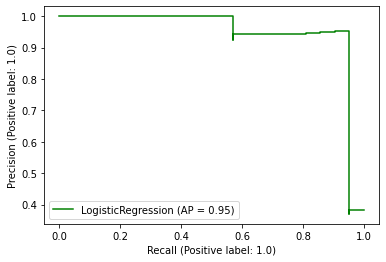

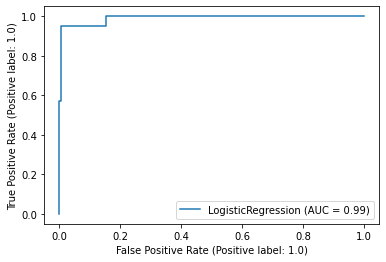

In [60]:
part = .7
x_t, x_v, y_t, y_v = train_test_split(X_scaled, y, train_size=part, stratify=y)

#Creem el regresor logístic
logireg = LogisticRegression(C=C_Log_Reg, fit_intercept=True, penalty='l2', tol=0.001)

# l'entrenem
logireg.fit(x_t, y_t)

print(metrics.classification_report(y_v, logireg.predict(x_v)))
plt.figure()
metrics.plot_precision_recall_curve(logireg,x_v,y_v, color = 'green')
metrics.plot_roc_curve(logireg,x_v,y_v)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       220
         1.0       0.95      0.95      0.95        21

    accuracy                           0.99       241
   macro avg       0.97      0.97      0.97       241
weighted avg       0.99      0.99      0.99       241



C:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

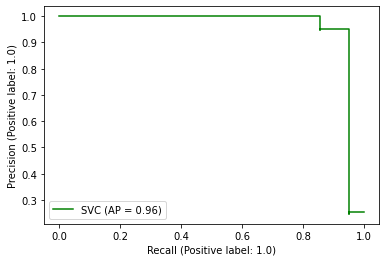

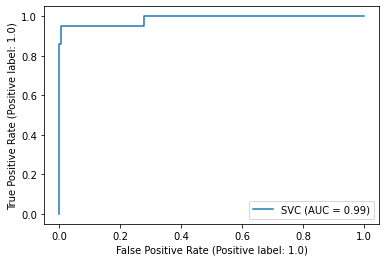

In [67]:
x_t, x_v, y_t, y_v = train_test_split(X_scaled, y, train_size=part, stratify=y)
#SVC rbf
svc = svm.SVC(C=C_SVM_rbf, kernel='rbf', gamma=0.9, probability=True)

# l'entrenem 
svc.fit(x_t, y_t)
print(metrics.classification_report(y_v, svc.predict(x_v)))
plt.figure()
metrics.plot_precision_recall_curve(svc,x_v,y_v, color='green')
metrics.plot_roc_curve(svc,x_v,y_v)

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       220
         1.0       1.00      0.86      0.92        21

    accuracy                           0.99       241
   macro avg       0.99      0.93      0.96       241
weighted avg       0.99      0.99      0.99       241



C:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

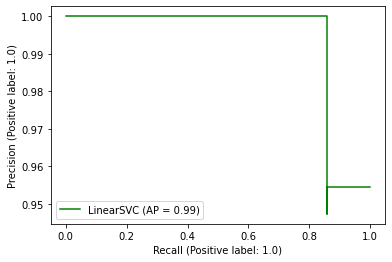

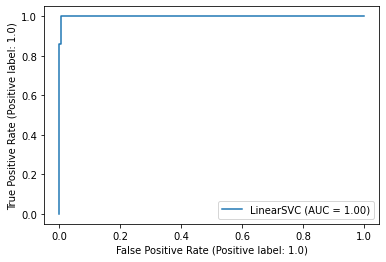

In [63]:
x_t, x_v, y_t, y_v = train_test_split(X_scaled, y, train_size=part, stratify=y)
#SVC Lineal
svcLin = svm.LinearSVC(C=C_SVM_Lin, max_iter=1000000)
svcLin.fit(x_t,y_t)
probs = svcLin.predict(x_v)
print(metrics.classification_report(y_v, probs))
plt.figure()
metrics.plot_precision_recall_curve(svcLin,x_v,y_v, color='green')
metrics.plot_roc_curve(svcLin,x_v,y_v)

In [ ]:
metrics.classification_report(logireg)

### 6. Hyperparameter Search
El motiu d'aplicar crossvalidació durant l'entrenament és que ens permet conèixer quin serà el resultat esperat del nostre model un cop en producció, és a dir, com es comportarà sobre dades mai vistes abans.
A més, també ens permet optimitzar quins són els hiperparametres dels models que millor funcionaran en el futur test.

**Preguntes:**
* Quines formes de buscar el millor parametre heu trobat? Són costoses computacionalment parlant? [documentació](https://scikit-learn.org/stable/modules/grid_search.html)
* Si disposem de recursos limitats (per exemple, un PC durant 1 hora) quin dels dos métodes creieu que obtindrà millor resultat final?
* Existeixen altres mètodes de búsqueda més eficients ([scikit-optimize](https://scikit-optimize.github.io/stable/))?
* Feu la prova, i amb el model i el metode de crossvalidació escollit, configureu els diferents metodes de búsqueda per a que s'executin durant el mateix temps (i.e. depenent del problema, 0,5h-1 hora). Analitzeu quin ha arribat a una millor solució. (estimeu el temps que trigarà a fer 1 training, i aixi trobeu el número de intents que podeu fer en cada cas.)

